In [1]:
#importing required libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [3]:
warnings.filterwarnings("ignore")

# 1. Data Loading

In [4]:
# Reading / Loading data

data = pd.read_csv("/content/drive/MyDrive/Master - Upgrad/Course 5 Module 12 Logistic Regression Project/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")

In [5]:
data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [6]:
data.shape

(9240, 37)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#2. Data Cleaning

## 2.1 Null handling

### Handling the "Select" level that is present in many of the categorical variables.<br>
We observe that there are "Select" values in many columns.It may be because the customer did not select any option from the list, hence it shows "Select"."Select" values are as good as NULL. So we can convert these values to null values.

In [9]:
# Converting "Select" values to NaN.
data = data.replace("Select", np.nan)

In [10]:
# checking the columns for null values. Using mean to get the percentage of null values for that column.
null_check = round(data.isnull().mean()*100,2)
null_check

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [11]:
# getting the columns that had null values greater of equal to 40
col_to_remove_for_null = null_check[null_check >=40].index.to_numpy()
col_to_remove_for_null

array(['How did you hear about X Education', 'Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'], dtype=object)

In [12]:
data.drop(col_to_remove_for_null , inplace = True, axis=1)

In [13]:
round(data.isnull().mean()*100,2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


Now we will check each of the columns that have higher number of null count and try to find why a lot of null values are present.

### 1) Column: "Specialization" <br> "Specialization" column has 36% null values.

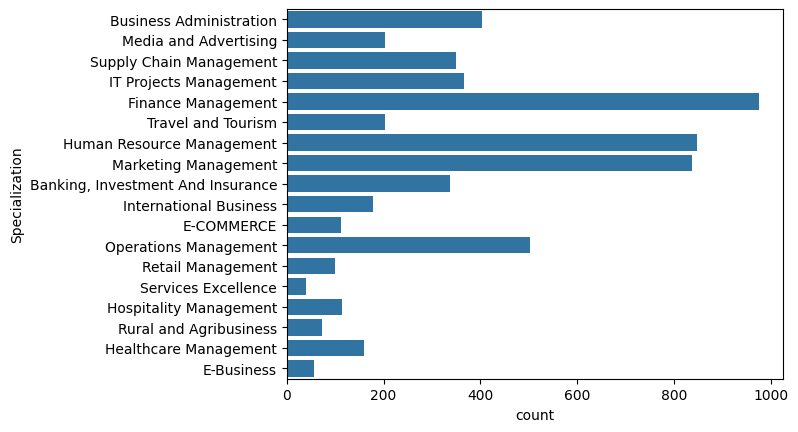

In [14]:
sns.countplot(data["Specialization"])
plt.show()

In [15]:
for i  in ["Lead Origin","Lead Source","What is your current occupation",]:
    print(data[data["Specialization"].isna()][i].value_counts())

Lead Origin
API                        2915
Lead Add Form               301
Landing Page Submission     125
Lead Import                  39
Name: count, dtype: int64
Lead Source
Olark Chat          1513
Google               899
Organic Search       367
Direct Traffic       162
Reference            144
Welingak Website     127
Referral Sites        90
Facebook              39
google                 5
bing                   4
Live Chat              2
Name: count, dtype: int64
What is your current occupation
Unemployed              1828
Student                   85
Working Professional      31
Businessman                2
Other                      1
Name: count, dtype: int64


This is seen that Speacialization is having null values if the lead comes through API and also if the occupation selected is Unemployed. Means it may be possible that the lead may leave this column blank if he may be a student or not having any specialization in the options given or his specialization is not there or in API we dont have this field as mandatory. So we can create a another category "Others" for this.

In [16]:
# Creating a separate category called "Others" for this
data["Specialization"] = data["Specialization"].replace(np.nan, "Others")

### 2) Tags column null handling <br>
"Tags" column has 36% missing values

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

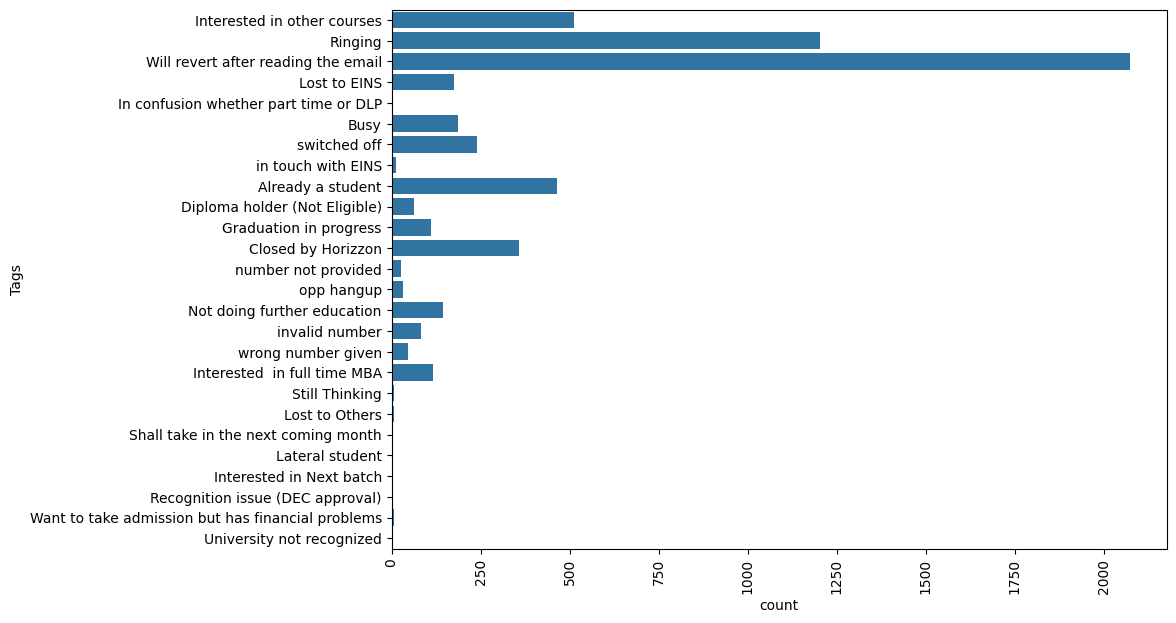

In [17]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(data["Tags"])
plt.xticks(rotation=90)

Since most values are "Will revert after reading the email" , we can impute missing values in this column with this value. (Null imputing categorical with Mode)

In [18]:
# Imputing the missing data in the tags column with "Will revert after reading the email"
data["Tags"]=data["Tags"].replace(np.nan,"Will revert after reading the email")

### 3) Column: "What matters most to you in choosing a course"<br>
this column has 29% missing values

In [19]:
# Finding the percentage of the different categories of this column:
round(data["What matters most to you in choosing a course"].value_counts(normalize=True),2)*100

,proportion
What matters most to you in choosing a course,
Better Career Prospects,100.0
Flexibility & Convenience,0.0
Other,0.0


It is evident that this is highly skewed(has only one value) column so we can remove this column.

In [20]:
# Dropping this column
data.drop("What matters most to you in choosing a course",axis=1, inplace = True)

### 4) Column: "What is your current occupation" <br>
this column has 29% missing values

In [21]:
# Finding the percentage of the different categories of this column:
round(data["What is your current occupation"].value_counts(normalize=True),2)*100

,proportion
What is your current occupation,
Unemployed,85.0
Working Professional,11.0
Student,3.0
Other,0.0
Housewife,0.0
Businessman,0.0


Since the most of values are Unemployed, null imputation can be done using mode value ie "Unemployed"

In [22]:
# Imputing the missing data in the "What is your current occupation" column with "Unemployed"
data["What is your current occupation"]=data["What is your current occupation"].replace(np.nan,"Unemployed")

### 5) Column: "Country" <br>
This column has 39% missing values

In [23]:
# Finding the percentage of the different categories of this column:
round(data["Country"].value_counts(normalize=True),2)*100

,proportion
Country,
India,96.0
United States,1.0
United Arab Emirates,1.0
Singapore,0.0
Saudi Arabia,0.0
United Kingdom,0.0
Australia,0.0
Qatar,0.0
Hong Kong,0.0


Since the most of values are India, null imputation can be done using mode value ie "India"

In [24]:
# Imputing the missing data in the "Country" column with "India"
data["Country"]=data["Country"].replace(np.nan,"India")

### 6) Column: "City" <br>
This column has 27% missing values

In [25]:
# Finding the percentage of the different categories of this column:
round(data["City"].value_counts(normalize=True),2)*100

,proportion
City,
Mumbai,58.0
Thane & Outskirts,13.0
Other Cities,12.0
Other Cities of Maharashtra,8.0
Other Metro Cities,7.0
Tier II Cities,1.0


Mode of this categorical column is Mumbai, hence replacing null with Mumbai

In [26]:
# Imputing the missing data in the "City" column with "Mumbai"
data["City"]=data["City"].replace(np.nan,"Mumbai")

In [27]:
# Finding the null percentages across columns after removing the above columns
round((data.isnull().mean()*100),2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


Columns that still has null values have it in very less quantity and hence the rows can be dropped

In [28]:
# Dropping the rows with null values
data.dropna(inplace = True)

In [29]:
round(data.isnull().mean()*100,2)

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


Since there is no null values remaining after rows containing null are dropped, lets calculate the percentage of rows retained

In [30]:
# Percentage of rows retained . 9240 was the original count of rows
(len(data.index)/9240)*100

98.2034632034632

#3. EDA

Checking for duplicate rows:

In [31]:
data[data.duplicated()].shape

(0, 29)

No duplicates in the data currently.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                            

##3.1 Univariate and Bivariate analysis

#### 1) Coverted column

In [33]:
data.Converted.value_counts()

,count
Converted,
0,5639
1,3435


In [34]:
Converted = (sum(data["Converted"])/len(data["Converted"].index))*100
Converted

37.85541106458012

lead conversion rate is ~38%

#### 2) Lead Origin

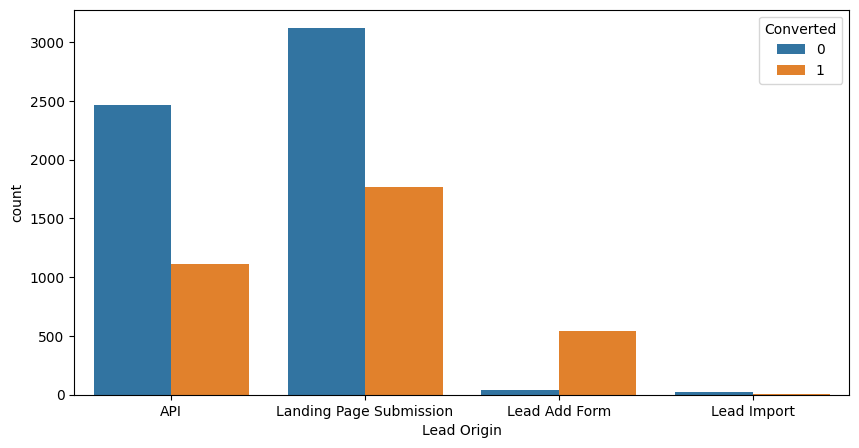

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
plt.show()

Inference:
1. Leads are mostly coming from "Landing Page Submission" and "API" but leads comming from them has a lesser coversion rate.
2. "Lead Import" has least leads.
3. Highest lead conversion are from leads that are sourced from "Lead Add Form".

#### 3) Lead Source

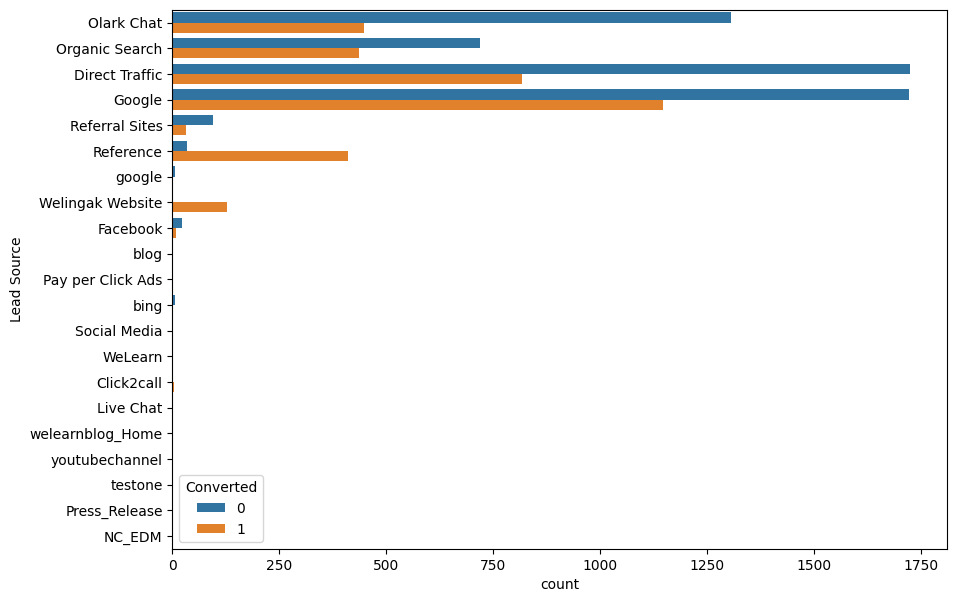

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(y = "Lead Source", hue = "Converted", data = data)
plt.show()

We are able to see similar text like google and Google. So we should bin these 2 data together.

In [37]:
# Need to replace "google" with "Google"
data["Lead Source"] = data["Lead Source"].replace(["google"], "Google")

In [38]:
lead_score_vc = data["Lead Source"].value_counts()
lead_score_vc

,count
Lead Source,
Google,2873
Direct Traffic,2543
Olark Chat,1753
Organic Search,1154
Reference,443
Welingak Website,129
Referral Sites,125
Facebook,31
bing,6


In [39]:
data["Lead Source"].replace(list(lead_score_vc[lead_score_vc <= 6].index),"Others",inplace=True)

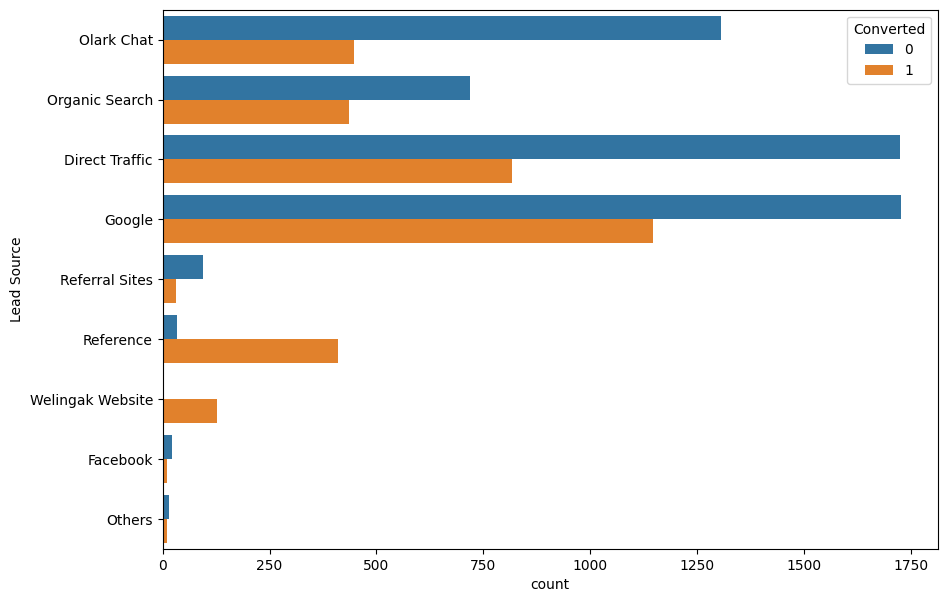

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(y = "Lead Source", hue = "Converted", data = data)
plt.show()

Inference:
1. Most of the leads are sourced from either "Google" or "Direct Traffic"
2. Conversion rate from "Reference" and "Welingak Website" is highest

Suggestion: Apart from "Reference" and "Welingak Website" the other Lead Sources needs to be focussed on to increase overall conversion rate.

#### 4) Do not email

Categorical column = boxplot

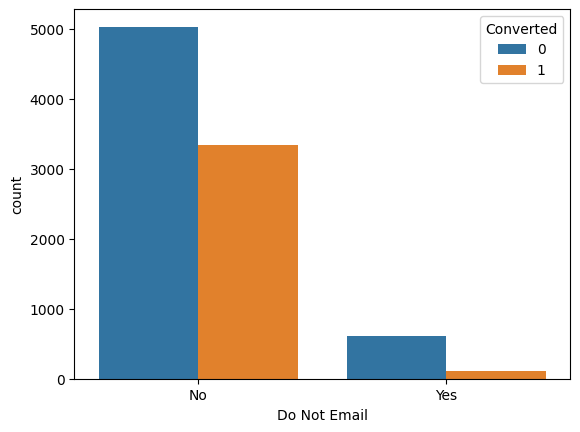

In [41]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = data)
plt.show()

Inference:
1. Majority of data is for "No"
2. The customers that have "Do not Email" have better conversion rate.

#### 5) Do not call

Categorical column = boxplot

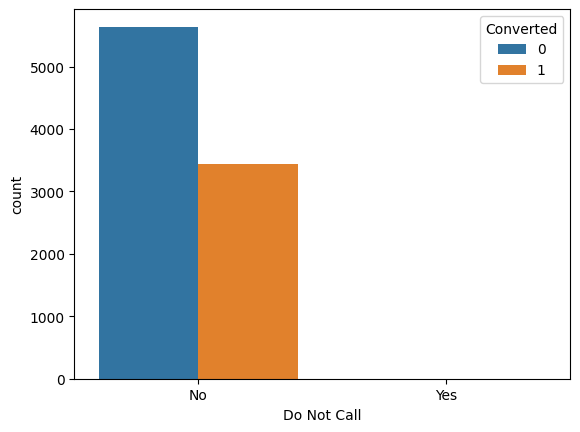

In [42]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = data)
plt.show()

In [43]:
data["Do Not Call"].value_counts()

,count
Do Not Call,
No,9072
Yes,2


Inference: <br> Negligible number of No. Very less variance, hence this column can be dropped.

#### 6) TotalVisits

numerical column = boxplot

In [44]:
data['TotalVisits'].describe()

,TotalVisits
count,9074.000000
mean,3.456028
std,4.858802
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,251.000000


<Axes: ylabel='TotalVisits'>

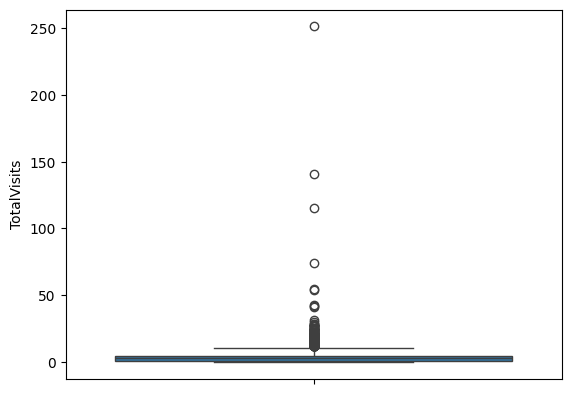

In [45]:
sns.boxplot(data['TotalVisits'],orient='vert')

As we can see there are lot of outliers in the data. We will cap the outliers to 95% value for analysis.

In [46]:
quantiles = data['TotalVisits'].quantile([0.05,0.95]).values
quantiles

array([ 0., 10.])

In [47]:
data.loc[data['TotalVisits'] <= quantiles[0], "TotalVisits"] = quantiles[0]
data.loc[data['TotalVisits'] >= quantiles[1], "TotalVisits"] = quantiles[1]

<Axes: ylabel='TotalVisits'>

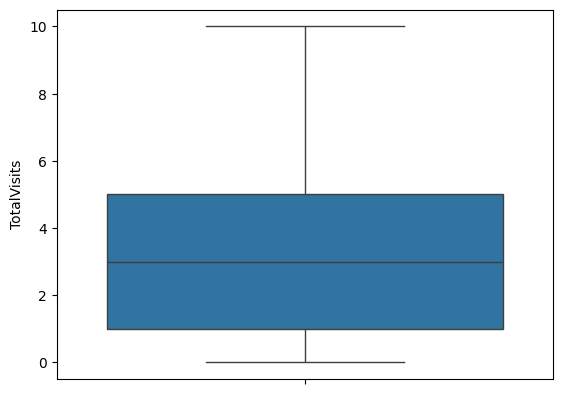

In [48]:
sns.boxplot(data['TotalVisits'],orient='vert')

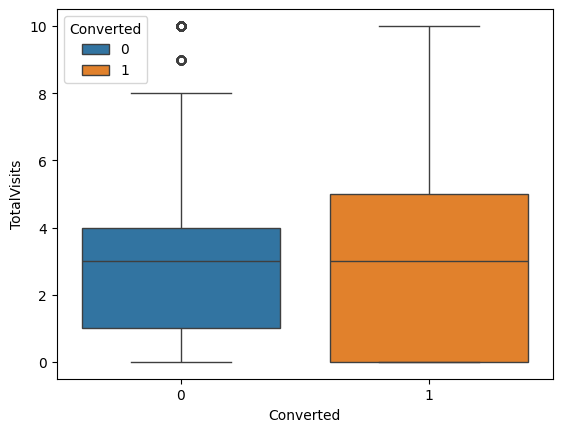

In [49]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data,hue = "Converted" )
plt.show()

Inference: <br> Median of coverted and not converted is same and hence nothing can be concluded from TotalVisits

#### 7) Total Time Spent on Website

In [50]:
data['Total Time Spent on Website'].describe()

,Total Time Spent on Website
count,9074.000000
mean,482.887481
std,545.256560
min,0.000000
25%,11.000000
50%,246.000000
75%,922.750000
max,2272.000000


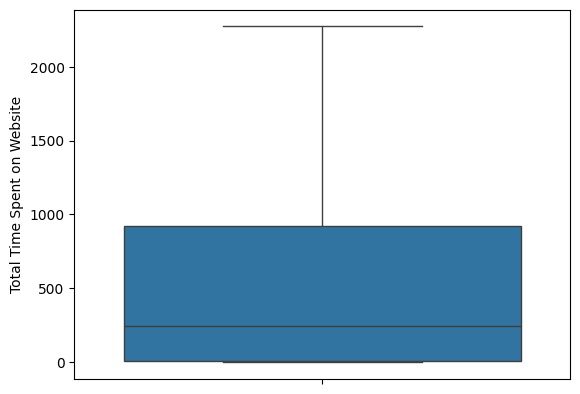

In [51]:
sns.boxplot(data['Total Time Spent on Website'])
plt.show()

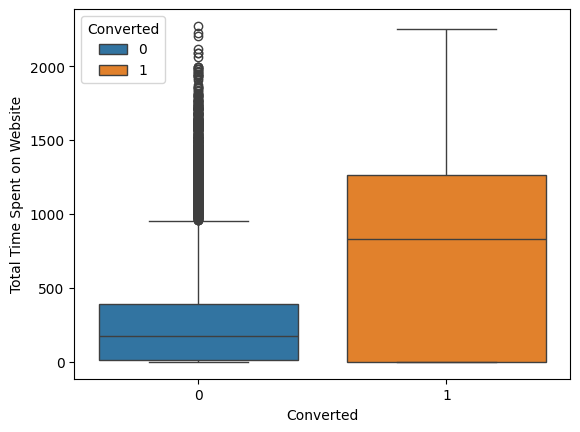

In [52]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data,hue = "Converted" )
plt.show()

Inference: <br> Leads spending more time in website are more likely for a conversion. Directly proportional.

#### 8) Page Views Per Visit

In [53]:
data['Page Views Per Visit'].describe()

,Page Views Per Visit
count,9074.000000
mean,2.370151
std,2.160871
min,0.000000
25%,1.000000
50%,2.000000
75%,3.200000
max,55.000000


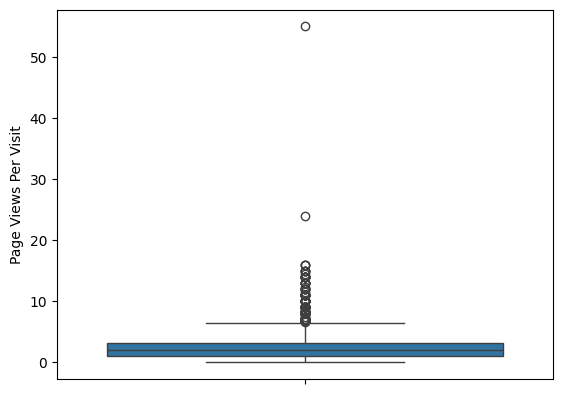

In [54]:
sns.boxplot(data['Page Views Per Visit'])
plt.show()

Since there are outlier, we will process the outlier.

In [55]:
quantiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data.loc[data['Page Views Per Visit'] <= quantiles[0], "Page Views Per Visit"] = quantiles[0]
data.loc[data['Page Views Per Visit'] >= quantiles[1], "Page Views Per Visit"] = quantiles[1]

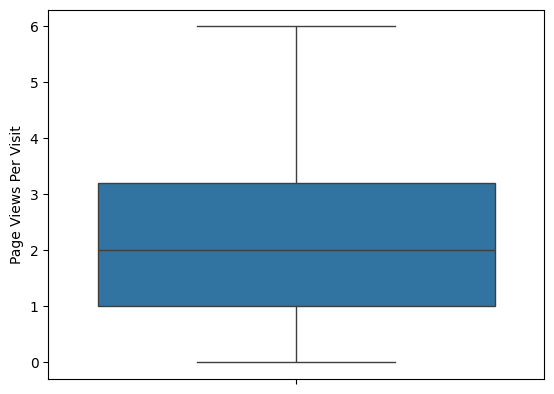

In [56]:
sns.boxplot(data['Page Views Per Visit'])
plt.show()

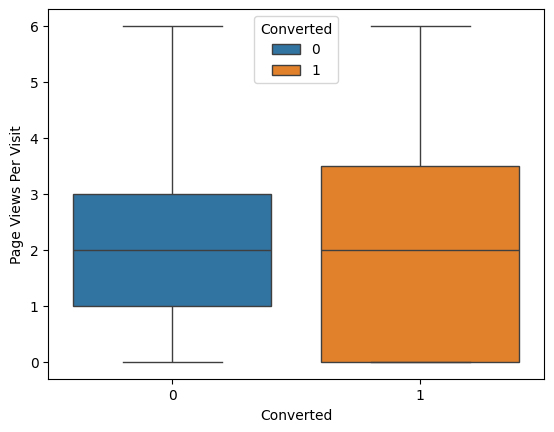

In [57]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data,hue = "Converted" )
plt.show()

Inference : <br>Since median of converted and non-converted are same , no inference can be drawn.

#### 9) Last Activity

Categorical col

In [58]:
data['Last Activity'].head()

,Last Activity
0,Page Visited on Website
1,Email Opened
2,Email Opened
3,Unreachable
4,Converted to Lead


In [59]:
data['Last Activity'].value_counts()

,count
Last Activity,
Email Opened,3432
SMS Sent,2716
Olark Chat Conversation,972
Page Visited on Website,640
Converted to Lead,428
Email Bounced,312
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,90


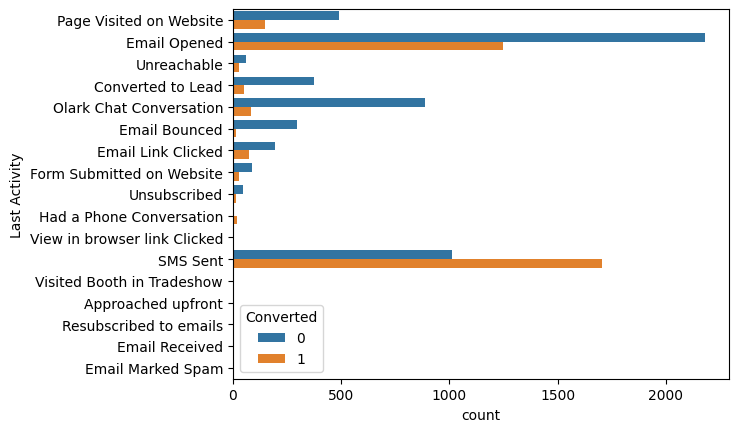

In [60]:
sns.countplot(y = "Last Activity", hue = "Converted", data = data)
plt.show()

In [61]:
last_activity_vc = data['Last Activity'].value_counts()
data["Last Activity"].replace(list(last_activity_vc[last_activity_vc <= 6].index),"Other_Activity",inplace=True)

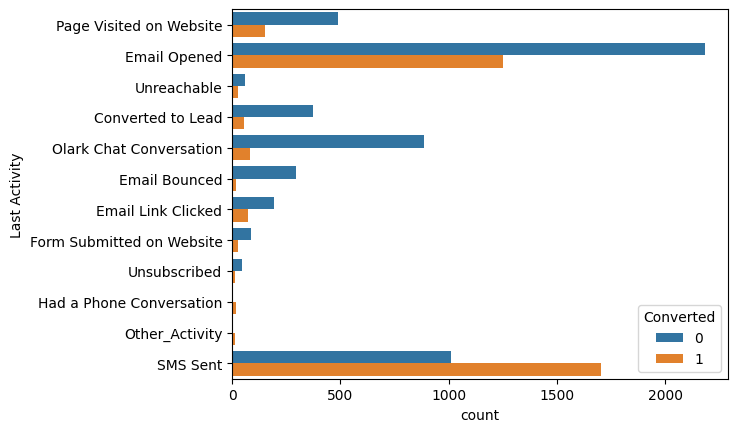

In [62]:
sns.countplot(y = "Last Activity", hue = "Converted", data = data)
plt.show()

Inference:
1. Customers that have "SMS Sent" as "Last Activity" have better conversion rate.
2. Most customer have "Opened Email" as "Last Activity"

#### 10) Country

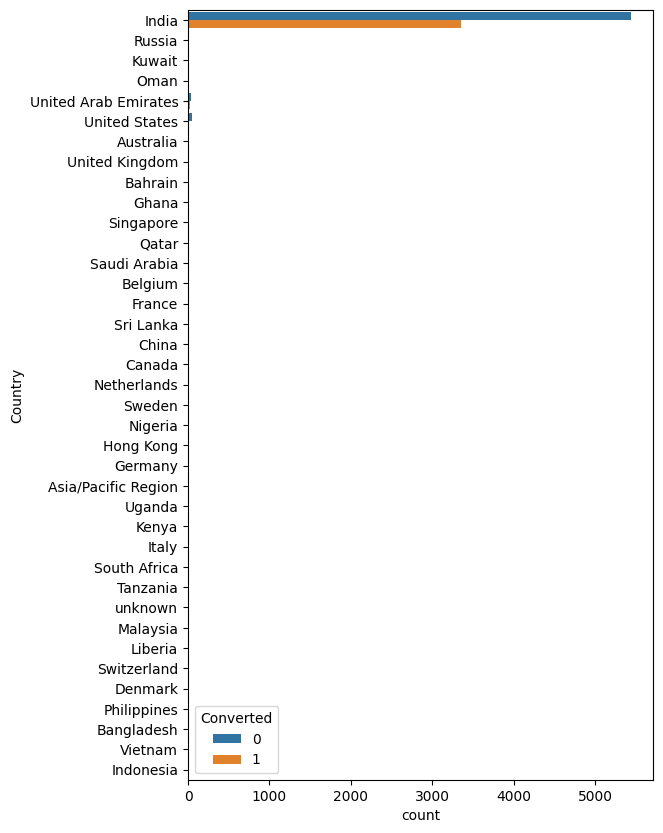

In [63]:
plt.figure(figsize=(6,10))
sns.countplot(y = "Country", hue = "Converted", data = data)
plt.show()

Leads have "Country" as "India". Very less variance hence this column can be dropped.

#### 11) Specialization

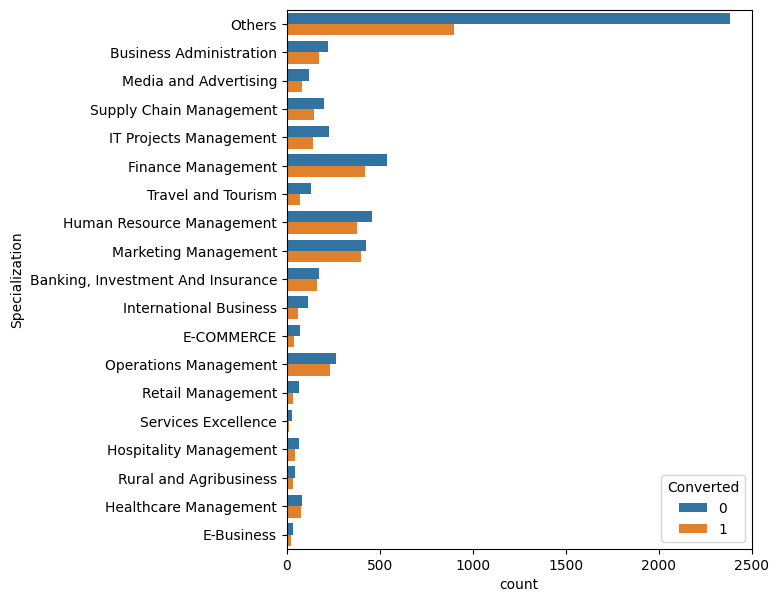

In [64]:
plt.figure(figsize=(6,7))
sns.countplot(y = "Specialization", hue = "Converted", data = data)
plt.show()

Inference : <br> Focus for conversion should be on the Specialization with high conversion rate

#### 12) What is your current occupation

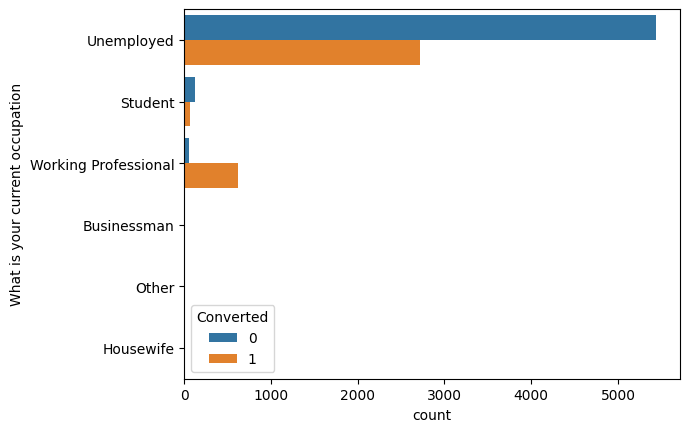

In [65]:
sns.countplot(y = "What is your current occupation", hue = "Converted", data = data)
plt.show()

In [66]:
data["What is your current occupation"].value_counts()

,count
What is your current occupation,
Unemployed,8159
Working Professional,677
Student,206
Other,15
Housewife,9
Businessman,8


Since Housewife can be considered as Unemployed

In [67]:
data['What is your current occupation']= data['What is your current occupation'].replace("Housewife","Other")

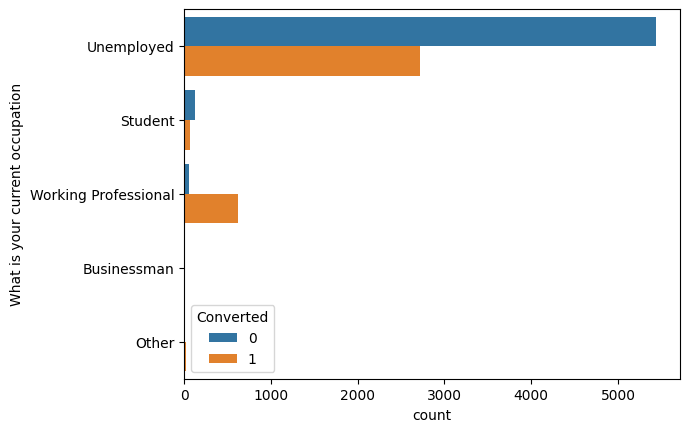

In [68]:
sns.countplot(y = "What is your current occupation", hue = "Converted", data = data)
plt.show()

#### 13) Search

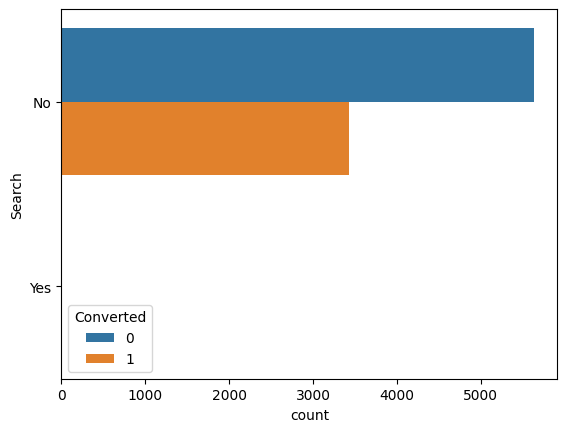

In [69]:
sns.countplot(y = "Search", hue = "Converted", data = data)
plt.show()

In [70]:
data.Search.value_counts()

,count
Search,
No,9060
Yes,14


Inference: <br>
Column can be dropped as variance is low. Only No is present in the column.

#### 14) Magazine

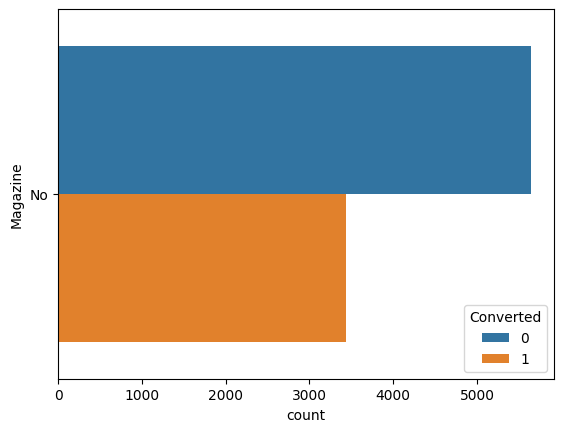

In [71]:
sns.countplot(y = "Magazine", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low. Only No is present in the column.

#### 15) Newspaper Article

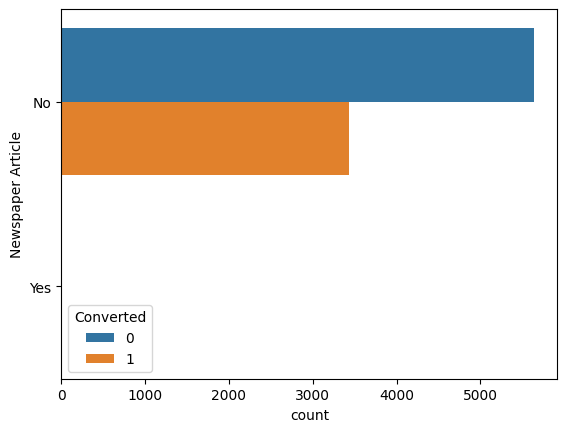

In [72]:
sns.countplot(y = "Newspaper Article", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Mostly "No" is present in the column.

#### 16) X Education Forums

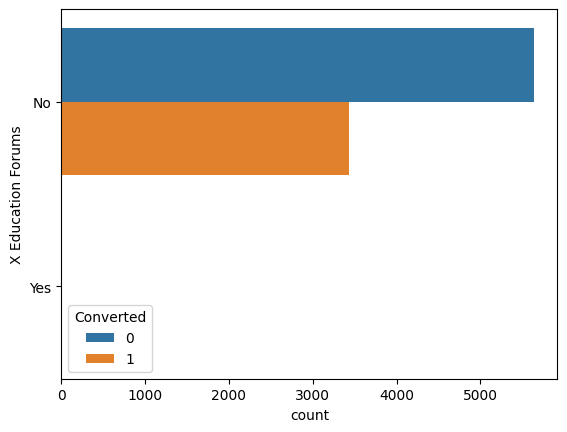

In [73]:
sns.countplot(y = "X Education Forums", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Mostly "No" is present in the column.

#### 17) Newspaper

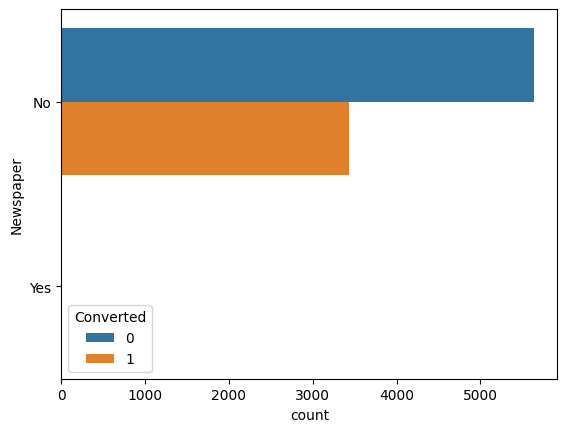

In [74]:
sns.countplot(y = "Newspaper", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Mostly "No" is present in the column.

#### 18) Digital Advertisement

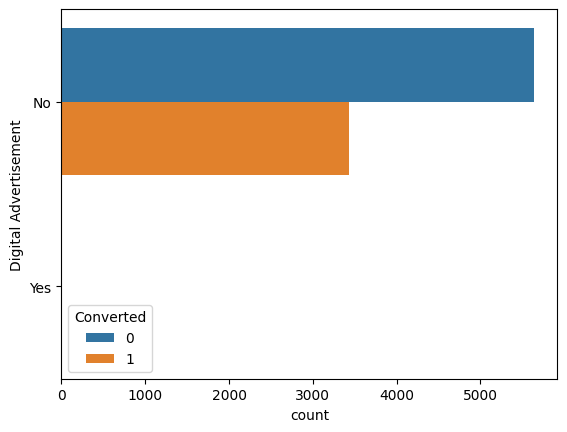

In [75]:
sns.countplot(y = "Digital Advertisement", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Mostly "No" is present in the column.

#### 19) Through Recommendations

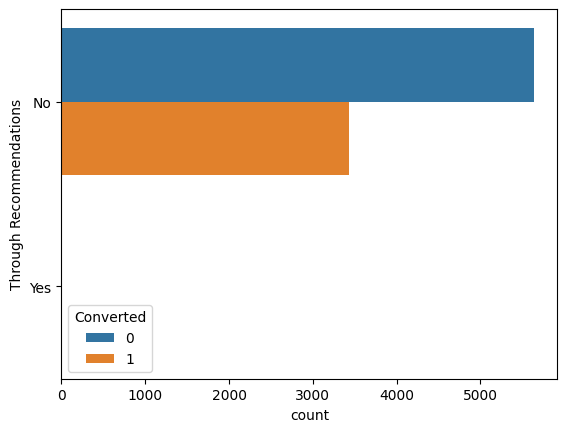

In [76]:
sns.countplot(y = "Through Recommendations", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Mostly "No" is present in the column.

#### 20) Receive More Updates About Our Courses

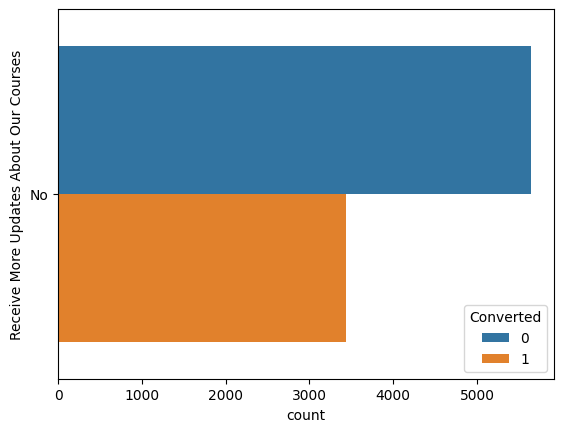

In [77]:
sns.countplot(y = "Receive More Updates About Our Courses", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Only "No" is present in the column.

#### 21) Tags

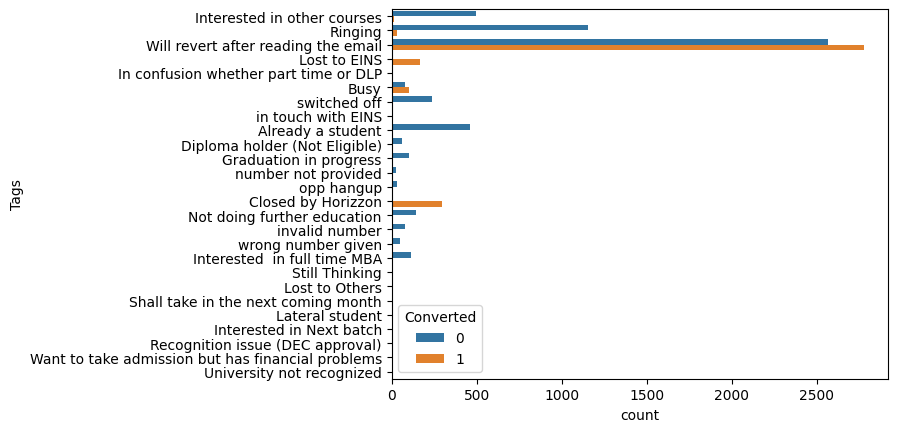

In [78]:
sns.countplot(y = "Tags", hue = "Converted", data = data)
plt.show()

Inference : <br>Since this is a column that is generated by sales team, this can be ignored and to be dropped from the table.

#### 22) Update me on Supply Chain Content

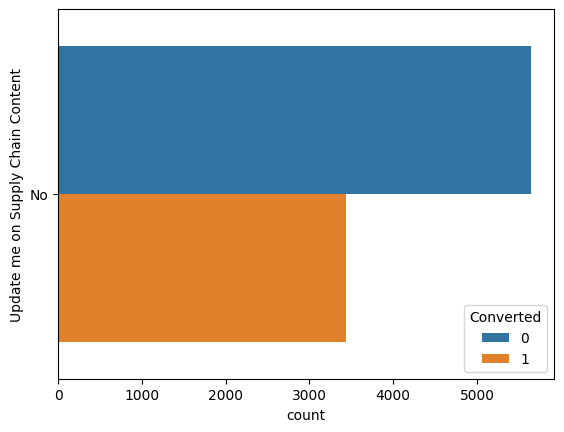

In [79]:
sns.countplot(y = "Update me on Supply Chain Content", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Only "No" is present in the column.

#### 23) Get updates on DM Conten

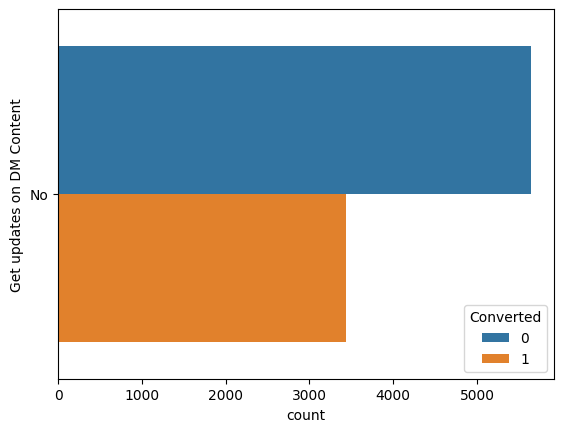

In [80]:
sns.countplot(y = "Get updates on DM Content", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Only "No" is present in the column.

#### 24) City

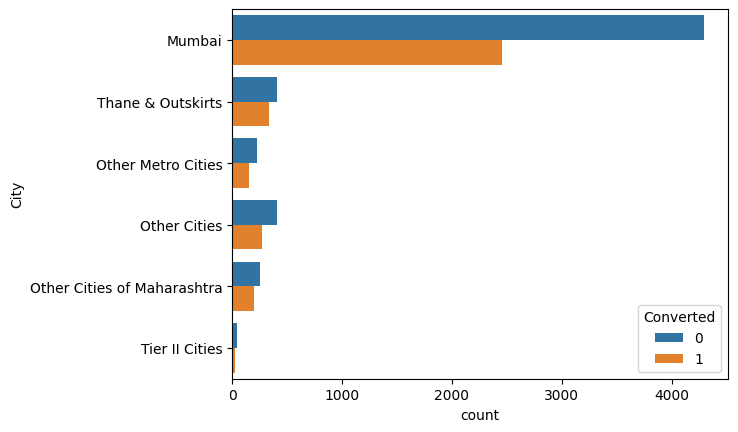

In [81]:
sns.countplot(y = "City", hue = "Converted", data = data)
plt.show()

Inference: <br>Most leads are from Mumbai. But highest conversion rate is from "Thane & Outskirts"

#### 25) I agree to pay the amount through cheque

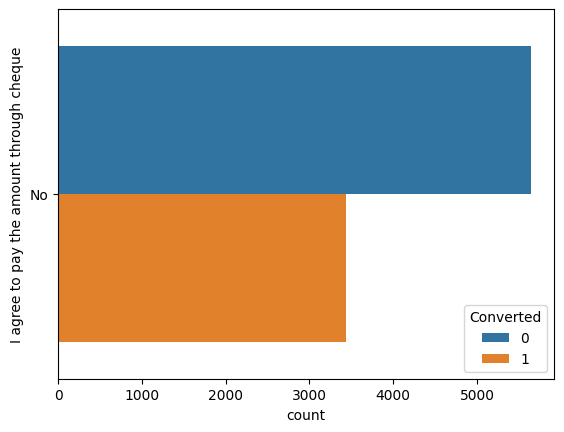

In [82]:
sns.countplot(y = "I agree to pay the amount through cheque", hue = "Converted", data = data)
plt.show()

Inference: <br>
Column can be dropped as variance is low.  Only "No" is present in the column.

#### 26) A free copy of Mastering The Interview

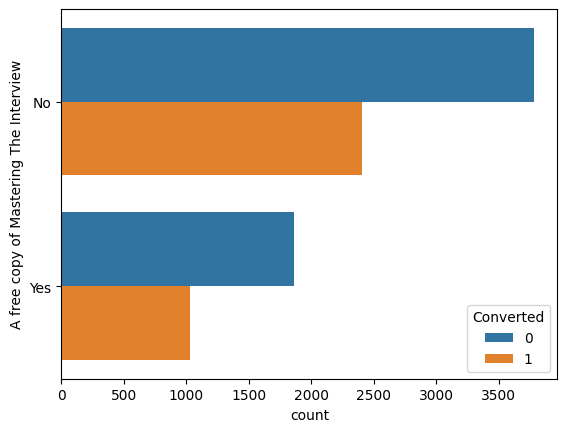

In [83]:
sns.countplot(y = "A free copy of Mastering The Interview", hue = "Converted", data = data)
plt.show()

In [84]:
# Calculating conversion rates for 'yes' and 'no' in the 'A free copy of Mastering The Interview' column
yes_conversion_rate = data[data['A free copy of Mastering The Interview'] == 'Yes']['Converted'].mean()
no_conversion_rate = data[data['A free copy of Mastering The Interview'] == 'No']['Converted'].mean()

print(f"Conversion rate for 'Yes' in 'A free copy of Mastering The Interview': {yes_conversion_rate:.2%}")
print(f"Conversion rate for 'No' in 'A free copy of Mastering The Interview': {no_conversion_rate:.2%}")


Conversion rate for 'Yes' in 'A free copy of Mastering The Interview': 35.66%
Conversion rate for 'No' in 'A free copy of Mastering The Interview': 38.88%


Inference : <br>Conversion rate for Yes and No for this column doesnt have any effect on conversion rate and hence this column can be dropped.

#### 27) Last Notable Activity

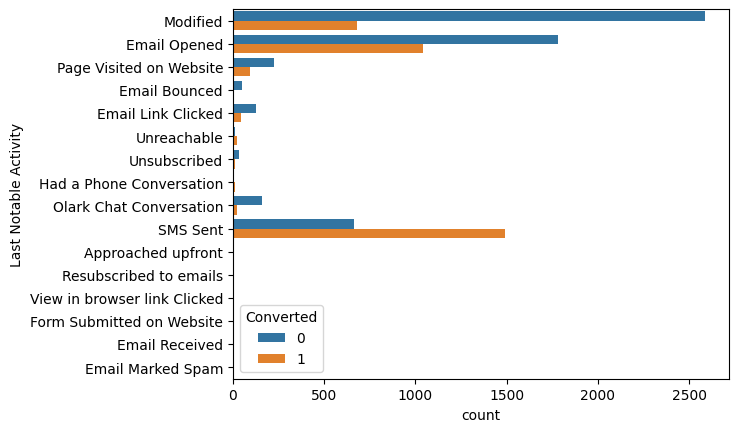

In [85]:
sns.countplot(y = "Last Notable Activity", hue = "Converted", data = data)
plt.show()

## 3.2 Dropping based on EDA

In [86]:
data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis = 1, inplace = True)

In [87]:
data.shape

(9074, 14)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

#4. Data Preparation

## 4.1 Converting some binary variables (Yes/No) to 1/0

In [89]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[vars] = data[vars].apply(binary_map)

## 4.2 Creating Dummy variables for the categorical features:<br>
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [90]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True, dtype=int)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
# Concatenating the dummy_data to the lead_data dataframe
data = pd.concat([data, dummy_data], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [92]:
data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1, inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Lead Origin_Landing Page Submission                   9074 non-null   int64  
 8   Lead Origin_Lead Add Form                             9074 non-

In [94]:
plt.figure(figsize=(20,20))
correlation_matrix = data.drop(columns=["Prospect ID"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#5. Splitting the Data

In [95]:
# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [96]:
# Putting target variable to y
y = data['Converted']
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [97]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

#6. Scaling

In [98]:
scaler = StandardScaler()
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5191,0,0,-1.150107,-0.884115,-1.263078,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6400,0,0,1.378218,-0.864051,0.038697,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6058,0,0,-0.427729,-0.426296,-0.145674,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2988,0,0,1.017028,1.363025,0.413028,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6352,1,0,0.294650,1.291890,0.971729,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Checking if the train test split has not changed the conversion rate.

In [99]:
# Checking the Lead Conversion rate
Converted = (sum(y_train)/len(y_train.index))*100
Converted

37.85230672335065

In [100]:
# Checking the Lead Conversion rate
Converted = (sum(y_test)/len(y_test.index))*100
Converted

37.862651487330155

In [101]:
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 26),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 2),
 ('Last Activity_Page Visited on Web

In [104]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

# 7. Model Building

In [105]:
import statsmodels.api as sm

##Iteration 1

In [106]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.2
Date:                Sun, 16 Mar 2025   Deviance:                       5240.4
Time:                        12:11:19   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3944
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2132      0.236      0.904      0.366      -0.249       0.675
Do Not Email                                            -1.6488      0.183     -8.998      0.000      -2.008      -1.290
Total Time Spent on Website                              1.0476      0.040     26.446      0.000       0.970       1.125
Lead Origin_Landing Page Submission                     -1.0638      0.127     -8.404      0.000      -1.312      -0.816
Lead Origin_Lead Add Form                                3.4478      0.247     13.970      0.000       2.964       3.932
Lead Source_Olark Chat                                   0.9997      0.122      8.167      0.000       0.760       1.240
Lead Source_Welingak Website                             3.1885      1.040      3.067      0.002       1.151       5.226
Last Activity_Had a Phone Conversation                   3.1811      1.407      2.260      0.024       0.423       5.940
Last Activity_Olark Chat Conversation                   -1.4345      0.172     -8.327      0.000      -1.772      -1.097
Specialization_Others                                   -1.1012      0.124     -8.900      0.000      -1.344      -0.859
What is your current occupation_Unemployed              -0.6554      0.210     -3.128      0.002      -1.066      -0.245
What is your current occupation_Working Professional     2.1283      0.285      7.463      0.000       1.569       2.687
Last Notable Activity_Had a Phone Conversation           0.0132      1.811      0.007      0.994      -3.537       3.563
Last Notable Activity_SMS Sent                           1.6941      0.080     21.186      0.000       1.537       1.851
Last Notable Activity_Unreachable                        1.8144      0.533      3.403      0.001       0.769       2.859
Last Notable Activity_Unsubscribed                       1.8494      0.490      3.778      0.000       0.890       2.809
========================================================================================================================
"""

In [107]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,9.21
2,Lead Origin_Landing Page Submission,5.69
8,Specialization_Others,4.03
4,Lead Source_Olark Chat,2.28
6,Last Activity_Had a Phone Conversation,2.01
11,Last Notable Activity_Had a Phone Conversation,2.01
3,Lead Origin_Lead Add Form,1.86
10,What is your current occupation_Working Profes...,1.61
7,Last Activity_Olark Chat Conversation,1.47
12,Last Notable Activity_SMS Sent,1.43


In [108]:
col1=cols.drop("Last Notable Activity_Had a Phone Conversation")

## Iteration 2

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.2
Date:                Sun, 16 Mar 2025   Deviance:                       5240.4
Time:                        12:11:19   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3944
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2132      0.236      0.905      0.366      -0.249       0.675
Do Not Email                                            -1.6489      0.183     -9.007      0.000      -2.008      -1.290
Total Time Spent on Website                              1.0476      0.040     26.446      0.000       0.970       1.125
Lead Origin_Landing Page Submission                     -1.0638      0.127     -8.404      0.000      -1.312      -0.816
Lead Origin_Lead Add Form                                3.4478      0.247     13.970      0.000       2.964       3.932
Lead Source_Olark Chat                                   0.9997      0.122      8.167      0.000       0.760       1.240
Lead Source_Welingak Website                             3.1885      1.040      3.067      0.002       1.151       5.226
Last Activity_Had a Phone Conversation                   3.1891      0.887      3.595      0.000       1.450       4.928
Last Activity_Olark Chat Conversation                   -1.4345      0.172     -8.327      0.000      -1.772      -1.097
Specialization_Others                                   -1.1012      0.124     -8.901      0.000      -1.344      -0.859
What is your current occupation_Unemployed              -0.6554      0.210     -3.128      0.002      -1.066      -0.245
What is your current occupation_Working Professional     2.1282      0.285      7.463      0.000       1.569       2.687
Last Notable Activity_SMS Sent                           1.6941      0.080     21.186      0.000       1.537       1.851
Last Notable Activity_Unreachable                        1.8144      0.533      3.403      0.001       0.769       2.859
Last Notable Activity_Unsubscribed                       1.8494      0.490      3.778      0.000       0.890       2.809
========================================================================================================================
"""

## Iteration 3

In [110]:
col2=col1.drop("Do Not Email")
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.8
Date:                Sun, 16 Mar 2025   Deviance:                       5345.7
Time:                        12:11:19   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1766      0.234      0.756      0.450      -0.281       0.635
Total Time Spent on Website                              1.0502      0.039     26.871      0.000       0.974       1.127
Lead Origin_Landing Page Submission                     -1.1584      0.126     -9.227      0.000      -1.404      -0.912
Lead Origin_Lead Add Form                                3.3913      0.245     13.824      0.000       2.910       3.872
Lead Source_Olark Chat                                   0.9924      0.122      8.147      0.000       0.754       1.231
Lead Source_Welingak Website                             3.1069      1.036      2.998      0.003       1.076       5.138
Last Activity_Had a Phone Conversation                   2.9938      0.831      3.604      0.000       1.366       4.622
Last Activity_Olark Chat Conversation                   -1.3988      0.172     -8.123      0.000      -1.736      -1.061
Specialization_Others                                   -1.1431      0.122     -9.334      0.000      -1.383      -0.903
What is your current occupation_Unemployed              -0.6375      0.207     -3.086      0.002      -1.042      -0.233
What is your current occupation_Working Professional     2.1965      0.283      7.761      0.000       1.642       2.751
Last Notable Activity_SMS Sent                           1.6800      0.079     21.325      0.000       1.526       1.834
Last Notable Activity_Unreachable                        1.8336      0.520      3.525      0.000       0.814       2.853
Last Notable Activity_Unsubscribed                       0.2871      0.457      0.628      0.530      -0.609       1.183
========================================================================================================================
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,9.20
1,Lead Origin_Landing Page Submission,5.61
7,Specialization_Others,4.01
3,Lead Source_Olark Chat,2.28
2,Lead Origin_Lead Add Form,1.86
9,What is your current occupation_Working Profes...,1.61
6,Last Activity_Olark Chat Conversation,1.46
10,Last Notable Activity_SMS Sent,1.43
4,Lead Source_Welingak Website,1.39
0,Total Time Spent on Website,1.31


## Iteration 4

In [112]:
col3=col2.drop("What is your current occupation_Unemployed")
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.4
Date:                Sun, 16 Mar 2025   Deviance:                       5354.9
Time:                        12:11:19   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4371      0.122     -3.592      0.000      -0.676      -0.199
Total Time Spent on Website                              1.0505      0.039     26.888      0.000       0.974       1.127
Lead Origin_Landing Page Submission                     -1.1600      0.126     -9.228      0.000      -1.406      -0.914
Lead Origin_Lead Add Form                                3.4055      0.245     13.902      0.000       2.925       3.886
Lead Source_Olark Chat                                   1.0056      0.122      8.261      0.000       0.767       1.244
Lead Source_Welingak Website                             3.0842      1.036      2.976      0.003       1.053       5.115
Last Activity_Had a Phone Conversation                   2.9737      0.831      3.580      0.000       1.346       4.602
Last Activity_Olark Chat Conversation                   -1.3930      0.172     -8.095      0.000      -1.730      -1.056
Specialization_Others                                   -1.1551      0.123     -9.407      0.000      -1.396      -0.914
What is your current occupation_Working Professional     2.8135      0.201     14.006      0.000       2.420       3.207
Last Notable Activity_SMS Sent                           1.6667      0.079     21.228      0.000       1.513       1.821
Last Notable Activity_Unreachable                        1.8245      0.518      3.520      0.000       0.809       2.840
Last Notable Activity_Unsubscribed                       0.2667      0.457      0.584      0.560      -0.629       1.163
========================================================================================================================
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.09
7,Specialization_Others,1.95
2,Lead Origin_Lead Add Form,1.57
6,Last Activity_Olark Chat Conversation,1.46
9,Last Notable Activity_SMS Sent,1.40
4,Lead Source_Welingak Website,1.37
0,Total Time Spent on Website,1.29
1,Lead Origin_Landing Page Submission,1.25
8,What is your current occupation_Working Profes...,1.19
11,Last Notable Activity_Unsubscribed,1.01


## Iteration 5

In [114]:
col4=col3.drop("Last Notable Activity_Unsubscribed")
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.6
Date:                Sun, 16 Mar 2025   Deviance:                       5355.2
Time:                        12:11:20   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4351      0.122     -3.578      0.000      -0.674      -0.197
Total Time Spent on Website                              1.0504      0.039     26.889      0.000       0.974       1.127
Lead Origin_Landing Page Submission                     -1.1599      0.126     -9.228      0.000      -1.406      -0.914
Lead Origin_Lead Add Form                                3.4035      0.245     13.896      0.000       2.923       3.884
Lead Source_Olark Chat                                   1.0057      0.122      8.263      0.000       0.767       1.244
Lead Source_Welingak Website                             3.0839      1.036      2.976      0.003       1.053       5.115
Last Activity_Had a Phone Conversation                   2.9716      0.831      3.578      0.000       1.344       4.599
Last Activity_Olark Chat Conversation                   -1.3955      0.172     -8.113      0.000      -1.733      -1.058
Specialization_Others                                   -1.1545      0.123     -9.404      0.000      -1.395      -0.914
What is your current occupation_Working Professional     2.8126      0.201     14.005      0.000       2.419       3.206
Last Notable Activity_SMS Sent                           1.6645      0.078     21.228      0.000       1.511       1.818
Last Notable Activity_Unreachable                        1.8223      0.518      3.516      0.000       0.806       2.838
========================================================================================================================
"""

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.09
7,Specialization_Others,1.95
2,Lead Origin_Lead Add Form,1.57
6,Last Activity_Olark Chat Conversation,1.46
9,Last Notable Activity_SMS Sent,1.40
4,Lead Source_Welingak Website,1.37
0,Total Time Spent on Website,1.29
1,Lead Origin_Landing Page Submission,1.25
8,What is your current occupation_Working Profes...,1.19
5,Last Activity_Had a Phone Conversation,1.00


Iteration 5 would be our final model as we dont have any columns left that are giving p-value less than 0.05 and VIF greater than 5

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
5191,0.051753
6400,0.076051
6058,0.406529
2988,0.818565
6352,0.440771
3828,0.150760
801,0.123415
3999,0.095865
7835,0.979578
875,0.084705


In [117]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
5191,0,0.051753
6400,0,0.076051
6058,0,0.406529
2988,1,0.818565
6352,0,0.440771


In [118]:
y_train_pred_final['Predicted']=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
5191,0,0.051753,0
6400,0,0.076051,0
6058,0,0.406529,0
2988,1,0.818565,1
6352,0,0.440771,0


In [119]:
y_train_pred_final[y_train_pred_final["Converted"]!=y_train_pred_final["Predicted"]].shape

(1218, 3)

In [120]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05175327, 0.07605064, 0.40652873, 0.81856547, 0.44077077,
       0.15076042, 0.12341508, 0.09586463, 0.97957807, 0.08470475])

#8. Model Evaluation

In [121]:
conf= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

array([[3502,  445],
       [ 773, 1631]])

In [122]:
# Predicted     not converted    converted
# Actual
# not converted      3502     445
# converted          773      1631

In [123]:
#checking the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8082191780821918

Inference: Accuracy looks good.

**Sensitivity, Specificity calculation to understand of we need for further optimizing using ROC curve.**

In [124]:
# true positive
TP = conf[1,1]
# true negatives
TN = conf[0,0]
# false positives
FP = conf[0,1]
# value of false negatives
FN = conf[1,0]

In [125]:
# calculating sensitivity
TP/(TP+FN)

0.6784525790349417

In [126]:
# calculating specificity
TN/(TN+FP)

0.8872561439067647

In [127]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11274385609323537


Inference : specificity is ~88% and the value is good but sensitivity is ~67% which is low.

To increase sensitivity we need to change the value of cut off point which was randomly chosen to be 0.5. Using ROC curve optimization we will chose the cut off.

##8.1 ROC Curve for optimising cut off

In [128]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

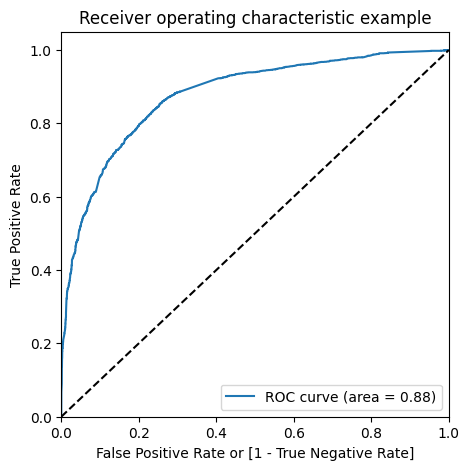

In [130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Since the ROC curve area is 0.88 , therefore model is good one.

In [131]:
# we have used cutoff of 0.5. To get optimal cut off we have to use mutiple cut off
num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5191,0,0.051753,0,1,0,0,0,0,0,0,0,0,0
6400,0,0.076051,0,1,0,0,0,0,0,0,0,0,0
6058,0,0.406529,0,1,1,1,1,1,0,0,0,0,0
2988,1,0.818565,1,1,1,1,1,1,1,1,1,1,0
6352,0,0.440771,0,1,1,1,1,1,0,0,0,0,0


In [132]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.378523,1.000000,0.000000
0.1,0.1,0.581483,0.962978,0.349126
0.2,0.2,0.773264,0.882280,0.706866
0.3,0.3,0.787435,0.841930,0.754244
0.4,0.4,0.803810,0.764143,0.827971
0.5,0.5,0.808219,0.678453,0.887256
0.6,0.6,0.797040,0.579035,0.929820
0.7,0.7,0.784443,0.505408,0.954396
0.8,0.8,0.758936,0.406406,0.973651
0.9,0.9,0.713431,0.261231,0.988852


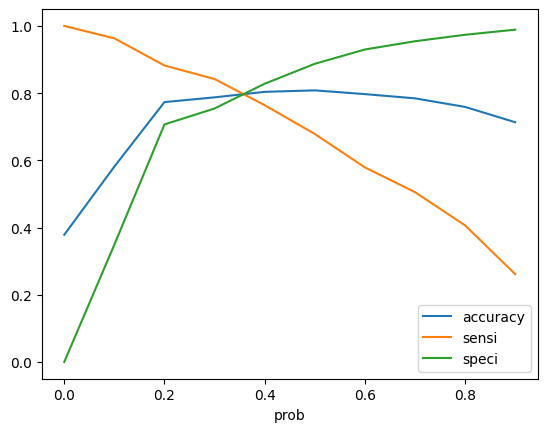

In [133]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From Graph optimal cut off is around 0.35

In [134]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
5191,0,0.051753,0,1,0,0,0,0,0,0,0,0,0,0
6400,0,0.076051,0,1,0,0,0,0,0,0,0,0,0,0
6058,0,0.406529,0,1,1,1,1,1,0,0,0,0,0,1
2988,1,0.818565,1,1,1,1,1,1,1,1,1,1,0,1
6352,0,0.440771,0,1,1,1,1,1,0,0,0,0,0,1


**Calculating Sensitivity, Specificity again to understand based on cut off if the model is predicting better or worse.**

In [135]:
# overall accuracy after changing cut off
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

0.7965674696898126

In [136]:
conf1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
conf1

array([[3131,  816],
       [ 476, 1928]])

In [137]:
# true positive
TP = conf1[1,1]
# true negatives
TN = conf1[0,0]
# false positives
FP = conf1[0,1]
# value of false negatives
FN = conf1[1,0]

In [138]:
# sensitivity
TP/(TP+FN)

0.8019966722129783

In [139]:
# specificity
TN/(TN+FP)

0.7932607043324044

Inference : By chossing cut off of 0.35 we have accuracy, sensitivity and specificity of around 80%.

In [140]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.20673929566759564


##8.2 Precision and Recall

In [141]:
from sklearn.metrics import precision_score, recall_score
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted))

Precision : 0.7026239067055393
Recall : 0.8019966722129783


Precision Recall Tradeoff

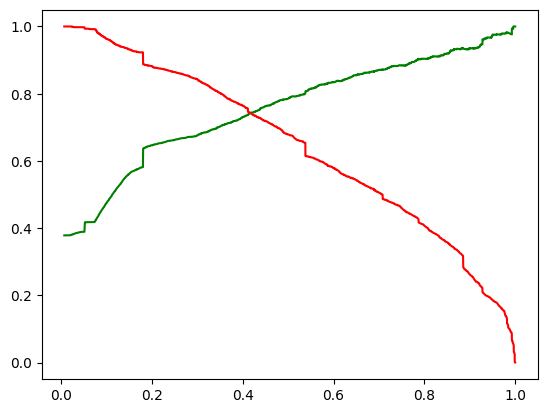

In [142]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#9. Predictions on test set

In [143]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [144]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col4]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
9192,-0.360633,1,0,0,0,0,0,0,0,0,0
901,1.715052,1,0,0,0,0,0,0,0,0,0
3710,1.671277,0,0,0,0,0,0,0,0,0,0
7452,0.571419,1,0,0,0,0,0,0,0,0,0
3418,-0.296794,1,0,0,0,0,0,0,0,0,0


In [145]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

,0
9192,0.121971
901,0.551434
3710,0.789250
7452,0.269958
3418,0.129337
5610,0.897075
5839,0.981461
5820,0.180544
946,0.189873
1287,0.975972


In [146]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [152]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [153]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,9192,1,0.121971
1,901,1,0.551434
2,3710,1,0.789250
3,7452,1,0.269958
4,3418,0,0.129337


##9.1 Model Evaluation based on Test set.

In [154]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [155]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.795813441057657


In [156]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1347,  345],
       [ 211,  820]])

In [157]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# sensitivity
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7953443258971872


In [159]:
# specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7960992907801419


In [160]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,9192,1,0.121971,0,12
1,901,1,0.551434,1,55
2,3710,1,0.789250,1,79
3,7452,1,0.269958,0,27
4,3418,0,0.129337,0,13


Observation : All of specificity, sensitivity, accuracy are ~80%.

**Model evaluation for test and train are almost same. Hence the model is not overfitted on the train set.**

##9.2 Which leads need to be contacted for conversion:

Using "Lead Score" columm we determine which lead should be followed up. We can define 'Hot Leads' as leads with "Lead Score" more than 82%. In industry this "Lead Score" will be defined by business.

In [161]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=82]
hot_leads.shape

(436, 5)

So there are 436 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [162]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([5610, 5839, 1287, 6096, 1612, 8190, 2748, 4592,  505, 3042, 8415,
       5687, 7187, 3248, 3299,  824, 8933, 3717, 3015, 6460, 2361, 6175,
       7468, 7725, 4788, 3097, 7883, 9083, 7851, 4959, 1263, 8942, 7245,
       1481, 5802, 1564, 1509, 1683, 1386, 7113, 3822, 5068, 2461, 3095,
       1475, 5363, 3601, 4734, 5300,  513, 5700, 1304,  746, 2714, 7690,
       6538, 2763, 1614, 7941, 1398, 8210, 3288, 6375, 2651, 5548, 3465,
       1926, 1200, 4081, 7096, 2727, 5822, 6944, 7766, 7259, 7412, 3761,
       8044, 5275, 6028, 4216, 3716, 6178, 5692, 1561, 2055, 4540, 4221,
       8620, 5291, 1379, 7089, 1488, 3055, 3265, 2069, 6243, 4403, 7857,
       4068, 2762, 6378, 8759, 2504, 5586, 4559, 2713, 8173, 7166,  964,
       5723, 8027, 2631, 1585, 2524, 7476, 7082, 8943, 7227, 8412, 5575,
       6792, 2705, 4230, 2519, 6727, 7978, 3296, 4583, 6694, 3244, 6170,
       2549, 8749, 2481, 3150, 5167, 5882, 7324, 7652, 7495, 4878, 9232,
        818, 2837, 1774, 5362, 1897, 2390, 4613, 72

##9.3 Finding out the Important Features from our final model

In [163]:
res.params.sort_values(ascending=False)

,0
Lead Origin_Lead Add Form,3.403532
Lead Source_Welingak Website,3.083945
Last Activity_Had a Phone Conversation,2.971572
What is your current occupation_Working Professional,2.812587
Last Notable Activity_Unreachable,1.822322
Last Notable Activity_SMS Sent,1.664532
Total Time Spent on Website,1.050429
Lead Source_Olark Chat,1.005666
const,-0.435145
Specialization_Others,-1.154489


#10. Recommendations

Leads **likely** for conversion :
1. lead sources from "Welingak Websites", "Olark Chat"
2. Occupation of "working professionals"
3. Who spent "more time on the websites"
4. Last Activity was "SMS Sent".


Leads **Unlikely** for conversion:
1. last activity was "Olark Chat Conversation"
2. lead origin was "Landing Page Submission"
3. Specialization was "Others"
4. Who chose the option of "Do not Email" as "yes"